## Document Denoising Using Autoencoder 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gc
%matplotlib inline

### 1. Loading Image from folder

In [2]:
def load_images(directory):
    
    import glob
    from keras.preprocessing.image import img_to_array,load_img
    import numpy as np

    
    path = glob.glob(directory)
    
    array_shape = (len(path), 258, 540, 1)
    image_shape = (258, 540,1)
    
    image_list = np.zeros(array_shape)
    for i, fig in enumerate(path):
        img = load_img(fig, target_size=image_shape,color_mode='grayscale')
        x = img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [3]:
X_train_img = load_images('data/train/*.png')
y_train_img = load_images('data/train_cleaned/*.png')
X_test_img = load_images('data/test/*.png')

Using TensorFlow backend.


In [4]:
print(X_train_img.shape)
print(y_train_img.shape)
print(X_test_img.shape)

(144, 258, 540, 1)
(144, 258, 540, 1)
(72, 258, 540, 1)


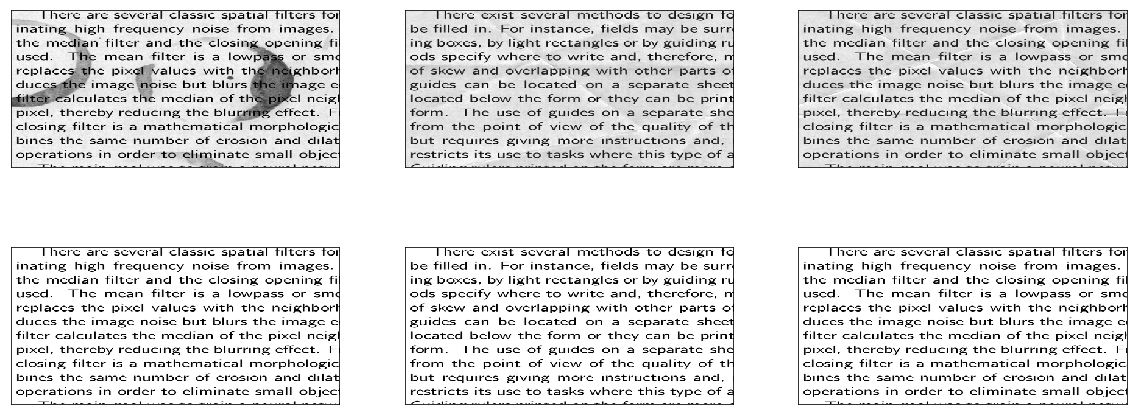

In [5]:

fig = plt.figure(figsize=(20,8))

for i in range(3):
    ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_img[8+i].reshape(258,540),cmap='gray')

    ax = fig.add_subplot(2, 3, i+4 , xticks=[], yticks=[])
    ax.imshow(y_train_img[8+i].reshape(258,540),cmap='gray')
    

    


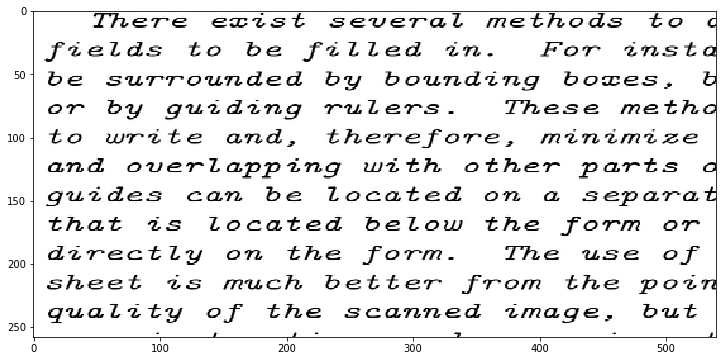

In [6]:
plt.figure(figsize=(18,6))
plt.imshow(y_train_img[20].reshape(258,540),cmap='gray')

####                                      Document without Noise - Target Image (y_train)

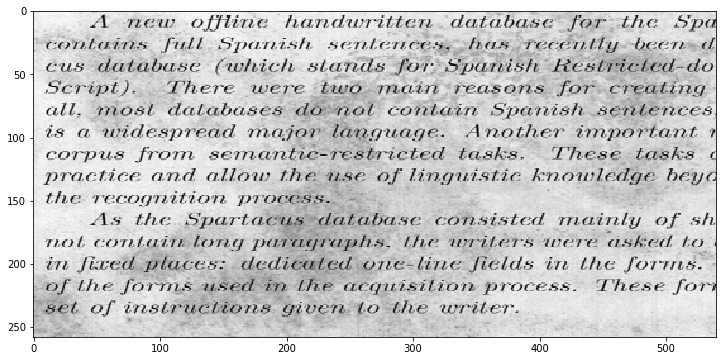

In [7]:
plt.figure(figsize=(18,6))
plt.imshow(X_test_img[20].reshape(258,540),cmap='gray',)

                Document without Noise - Test Image (X_test)

### 2. Splitting the data into train,test

In [8]:
X_train,y_train = X_train_img,y_train_img
X_test = X_test_img


In [9]:
print("Train Images",X_train.shape[0])
print("Test Images",X_test.shape[0])

Train Images 144
Test Images 72


In [10]:
X_test.shape

(72, 258, 540, 1)

### 3. Autoencoder Model

In [11]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense
from keras.models import Model
from keras.activations import relu,sigmoid
from keras.losses import MSE
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [12]:
X_train.shape

(144, 258, 540, 1)

In [13]:

input_layer = Input(shape=(258, 540, 1))
        
#Encoder
x = Dense(32)(input_layer)
x = Conv2D(64, 3, activation=relu, padding='same')(input_layer)
x = MaxPooling2D(2, padding='same')(x)
#x = Conv2D(64, 3 , activation=relu, padding='same')(x)
#x = MaxPooling2D(2, padding='same')(x)
        
#Decoder
x = Conv2D(64, 3, activation=relu, padding='same')(x)
x = UpSampling2D(2)(x)
x = Dense(32)(x)
#x = Conv2D(32, 3, activation=relu, padding='same')(x)
#x = UpSampling2D(2,(x))

output_layer = Conv2D(1, 3, activation=sigmoid, padding='same')(x)
autoencoder = Model(input_layer, output_layer)

autoencoder.compile(loss=MSE, optimizer=Adam())

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 258, 540, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 258, 540, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 129, 270, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 129, 270, 64)      36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 258, 540, 64)      0         
_________________________________________________________________
dense_2 (Dense)              (None, 258, 540, 32)      2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 258, 540, 1)       289       
Total para

In [15]:
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='autoencoder.hdf5',save_best_only=True,verbose=1)

callbacks = [checkpointer]

In [16]:
history = autoencoder.fit(X_train, y_train,
                          batch_size=12,
                          epochs=200,
                          validation_split=0.15,
                          callbacks=callbacks,
                          verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 122 samples, validate on 22 samples
Epoch 1/200
122/122 [==============================] - 7s 58ms/step - loss: 0.1014 - val_loss: 0.0649

Epoch 00001: val_loss improved from inf to 0.06486, saving model to autoencoder.hdf5
Epoch 2/200
122/122 [==============================] - 3s 23ms/step - loss: 0.0742 - val_loss: 0.0565

Epoch 00002: val_loss improved from 0.06486 to 0.05653, saving model to autoencoder.hdf5
Epoch 3/200
122/122 [==============================] - 3s 23ms/step - loss: 0.0619 - val_loss: 0.0463

Epoch 00003: val_loss improved from 0.05653 to 0.04630, saving model to autoencoder.hdf5
Epoch 4/200
122/122 [==============================] - 3s 24ms/step - loss: 0.0478 - val_loss: 0.0335

Epoch 00004: val_loss improved from 0.04630 to 0.03348, saving model to autoencoder.hdf5
Epoch 5/200
122/122 [==============================] - 3s 24ms/step - loss: 0.0356 - val_loss: 0.0243

Epoch 00005: val_loss improved from 0.03

122/122 [==============================] - 2s 19ms/step - loss: 0.0047 - val_loss: 0.0040

Epoch 00043: val_loss improved from 0.00414 to 0.00403, saving model to autoencoder.hdf5
Epoch 44/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0047 - val_loss: 0.0044

Epoch 00044: val_loss did not improve from 0.00403
Epoch 45/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0046 - val_loss: 0.0039

Epoch 00045: val_loss improved from 0.00403 to 0.00391, saving model to autoencoder.hdf5
Epoch 46/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0045 - val_loss: 0.0040

Epoch 00046: val_loss did not improve from 0.00391
Epoch 47/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0043 - val_loss: 0.0039

Epoch 00047: val_loss improved from 0.00391 to 0.00387, saving model to autoencoder.hdf5
Epoch 48/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0043 - val_loss: 0.0037

Epoch 00048: val_los

122/122 [==============================] - 2s 19ms/step - loss: 0.0026 - val_loss: 0.0026

Epoch 00089: val_loss did not improve from 0.00245
Epoch 90/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0027 - val_loss: 0.0025

Epoch 00090: val_loss did not improve from 0.00245
Epoch 91/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0027 - val_loss: 0.0024

Epoch 00091: val_loss improved from 0.00245 to 0.00238, saving model to autoencoder.hdf5
Epoch 92/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0026 - val_loss: 0.0024

Epoch 00092: val_loss did not improve from 0.00238
Epoch 93/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0026 - val_loss: 0.0023

Epoch 00093: val_loss improved from 0.00238 to 0.00234, saving model to autoencoder.hdf5
Epoch 94/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0026 - val_loss: 0.0023

Epoch 00094: val_loss improved from 0.00234 to 0.00233, sa


Epoch 00136: val_loss improved from 0.00186 to 0.00186, saving model to autoencoder.hdf5
Epoch 137/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0020 - val_loss: 0.0019

Epoch 00137: val_loss did not improve from 0.00186
Epoch 138/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0020 - val_loss: 0.0019

Epoch 00138: val_loss did not improve from 0.00186
Epoch 139/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0020 - val_loss: 0.0018

Epoch 00139: val_loss improved from 0.00186 to 0.00179, saving model to autoencoder.hdf5
Epoch 140/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0019 - val_loss: 0.0018

Epoch 00140: val_loss did not improve from 0.00179
Epoch 141/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0019 - val_loss: 0.0019

Epoch 00141: val_loss did not improve from 0.00179
Epoch 142/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0020 - val_l

122/122 [==============================] - 2s 19ms/step - loss: 0.0017 - val_loss: 0.0016

Epoch 00185: val_loss improved from 0.00157 to 0.00157, saving model to autoencoder.hdf5
Epoch 186/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0017 - val_loss: 0.0017

Epoch 00186: val_loss did not improve from 0.00157
Epoch 187/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0017 - val_loss: 0.0016

Epoch 00187: val_loss did not improve from 0.00157
Epoch 188/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0017 - val_loss: 0.0017

Epoch 00188: val_loss did not improve from 0.00157
Epoch 189/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0017 - val_loss: 0.0015

Epoch 00189: val_loss improved from 0.00157 to 0.00155, saving model to autoencoder.hdf5
Epoch 190/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0017 - val_loss: 0.0016

Epoch 00190: val_loss did not improve from 0.00155
Ep

In [17]:
gc.collect()

20

### 4. Model Evaluation

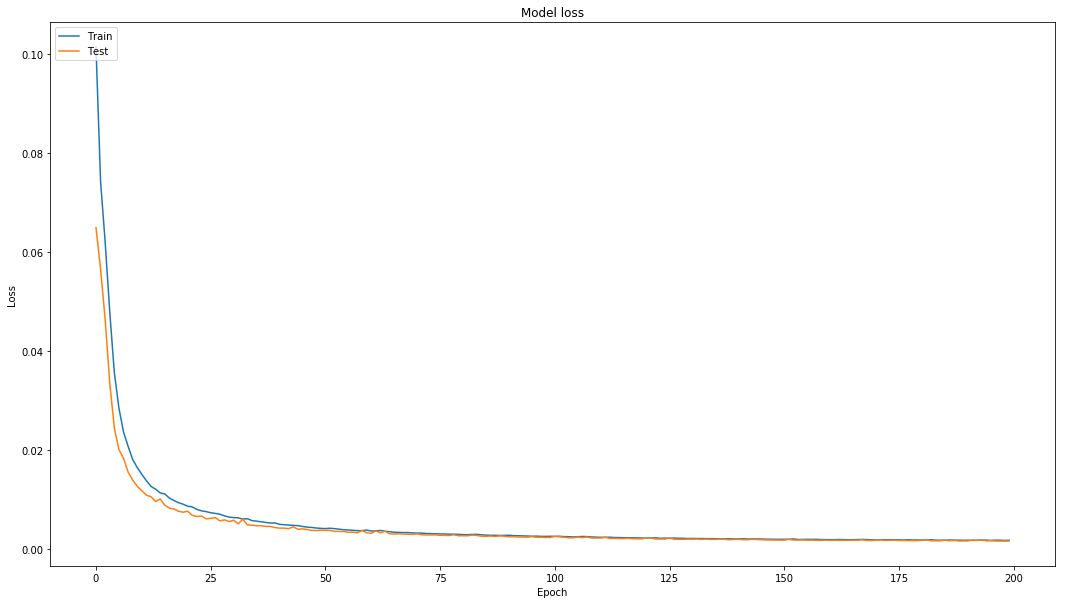

In [18]:
plt.figure(figsize=(18,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 5. Prediction

In [19]:
preds_0 = autoencoder.predict(X_test[:20])
preds_1 = autoencoder.predict(X_test[20:40])
preds_2 = autoencoder.predict(X_test[40:60])
preds_3 = autoencoder.predict(X_test[60:])


pred = np.concatenate((preds_0,preds_1,preds_2,preds_3),axis=0)
print(pred.shape)

(72, 258, 540, 1)


In [20]:
pred = pred.reshape(72, 258, 540)
X_test = X_test.reshape(72, 258, 540)

### 6. Comparison

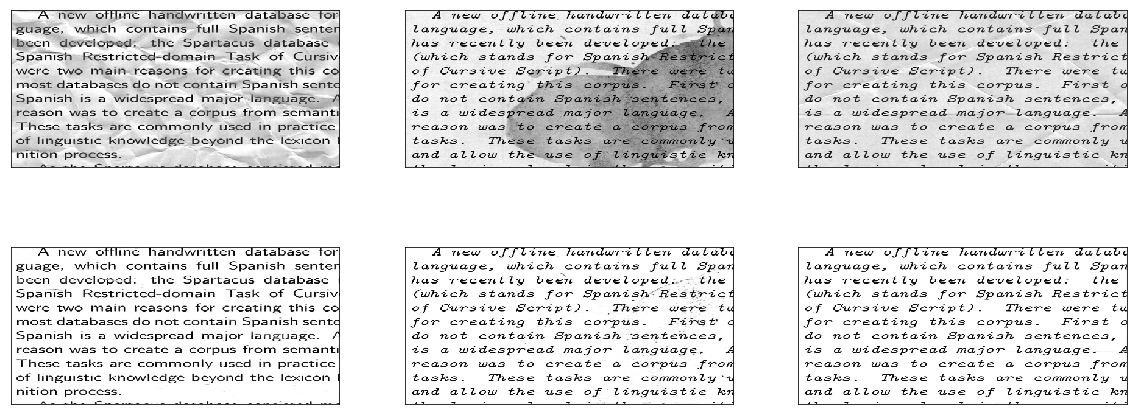

In [21]:
fig = plt.figure(figsize=(20,8))

for i in range(3):
    ax = fig.add_subplot(2, 3, i+1 , xticks=[], yticks=[])
    ax.imshow(X_test[8+i],cmap='gray')

    ax = fig.add_subplot(2, 3, i+4 , xticks=[], yticks=[])
    ax.imshow(pred[8+i],cmap='gray')
    


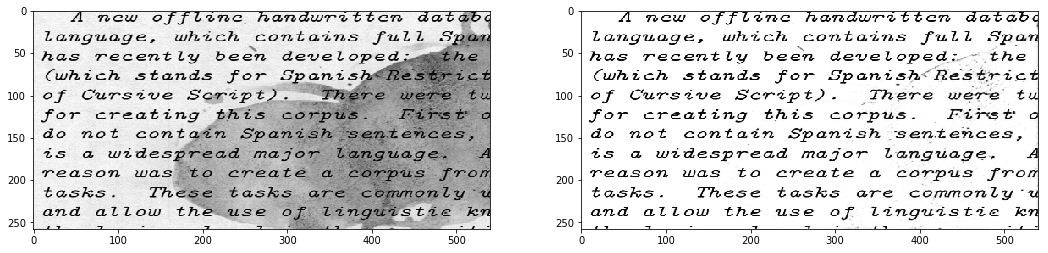

In [22]:
fig = plt.figure(figsize=(18,12))

for i in range(1):
    ax = fig.add_subplot(1, 2, i+1 )
    ax.imshow(X_test[9],cmap='gray')

    ax = fig.add_subplot(1, 2, i+2 )
    ax.imshow(pred[9],cmap='gray')
    
